# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # Add cities with space into consideration as well
    city_url = url + "&q=" + city.replace(" ","+")

#     print (city_url)
    
#     break

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | husavik
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lazaro cardenas
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | maun
Processing Record 9 of Set 1 | alyangula
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | batemans bay
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | bongaree
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | galiwinku
City not found. Skipping...
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | guerrero negro
Proce

Processing Record 41 of Set 4 | aden
Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 44 of Set 4 | canillo
Processing Record 45 of Set 4 | anchorage
Processing Record 46 of Set 4 | cartagena
Processing Record 47 of Set 4 | asmar
Processing Record 48 of Set 4 | sayyan
Processing Record 49 of Set 4 | oudtshoorn
Processing Record 0 of Set 5 | shostka
Processing Record 1 of Set 5 | watertown
Processing Record 2 of Set 5 | saint-augustin
Processing Record 3 of Set 5 | hofn
Processing Record 4 of Set 5 | inza
Processing Record 5 of Set 5 | marsabit
Processing Record 6 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 7 of Set 5 | klyuchi
Processing Record 8 of Set 5 | saint anthony
Processing Record 9 of Set 5 | oistins
Processing Record 10 of Set 5 | jiangyou
Processing Record 11 of Set 5 | margate
Processing Record 12 of Set 5 | the valley
Processing Record 13 of Set 5 | emerald
Processin

Processing Record 30 of Set 8 | deputatskiy
Processing Record 31 of Set 8 | grafton
Processing Record 32 of Set 8 | ankpa
Processing Record 33 of Set 8 | pasni
Processing Record 34 of Set 8 | bajo baudo
City not found. Skipping...
Processing Record 35 of Set 8 | olafsvik
Processing Record 36 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 37 of Set 8 | kenai
Processing Record 38 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 39 of Set 8 | le port
Processing Record 40 of Set 8 | sorland
Processing Record 41 of Set 8 | snezhnogorsk
Processing Record 42 of Set 8 | cangucu
Processing Record 43 of Set 8 | beyla
Processing Record 44 of Set 8 | xuanzhou
Processing Record 45 of Set 8 | rodrigues alves
Processing Record 46 of Set 8 | jacareacanga
Processing Record 47 of Set 8 | ixtapa
Processing Record 48 of Set 8 | guadalupe y calvo
Processing Record 49 of Set 8 | tinyahuarco
Processing Record 0 of Set 9 | zeya
Processing Record 1 of Set 9 | port shepstone

Processing Record 15 of Set 12 | turinsk
Processing Record 16 of Set 12 | zhangjiakou
Processing Record 17 of Set 12 | safwah
City not found. Skipping...
Processing Record 18 of Set 12 | mincivan
Processing Record 19 of Set 12 | san rafael del sur
Processing Record 20 of Set 12 | myrtle beach
Processing Record 21 of Set 12 | marsh harbour
Processing Record 22 of Set 12 | borogontsy
Processing Record 23 of Set 12 | morristown
Processing Record 24 of Set 12 | north myrtle beach
Processing Record 25 of Set 12 | patnos
Processing Record 26 of Set 12 | itupiranga
Processing Record 27 of Set 12 | begunitsy
Processing Record 28 of Set 12 | port said
Processing Record 29 of Set 12 | cumberland
Processing Record 30 of Set 12 | udachnyy
Processing Record 31 of Set 12 | libertador general san martin
Processing Record 32 of Set 12 | kitimat
Processing Record 33 of Set 12 | rominimbang
Processing Record 34 of Set 12 | omboue
Processing Record 35 of Set 12 | vestmannaeyjar
Processing Record 36 of Se

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,husavik,66.0449,-17.3389,-3.94,58,80,7.00,IS,1675791233
1,pevek,69.7008,170.3133,-30.54,96,100,1.29,RU,1675791248
2,bluff,-46.6000,168.3333,10.45,73,86,10.97,NZ,1675791070
3,jamestown,42.0970,-79.2353,8.34,50,75,6.17,US,1675791096
4,lazaro cardenas,17.9583,-102.2000,28.65,54,26,2.87,MX,1675791255


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,husavik,66.0449,-17.3389,-3.94,58,80,7.00,IS,1675791233
1,pevek,69.7008,170.3133,-30.54,96,100,1.29,RU,1675791248
2,bluff,-46.6000,168.3333,10.45,73,86,10.97,NZ,1675791070
3,jamestown,42.0970,-79.2353,8.34,50,75,6.17,US,1675791096
4,lazaro cardenas,17.9583,-102.2000,28.65,54,26,2.87,MX,1675791255


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

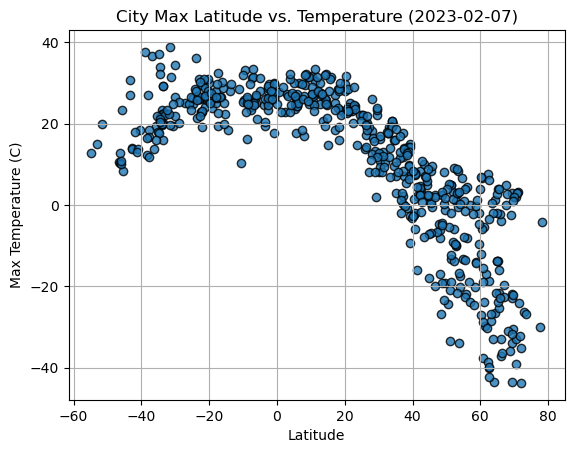

In [17]:
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

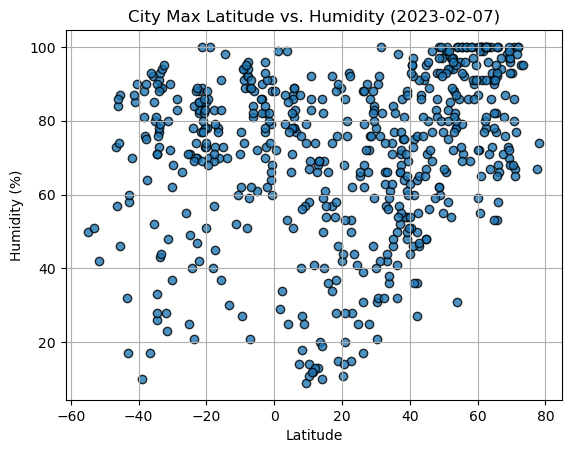

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

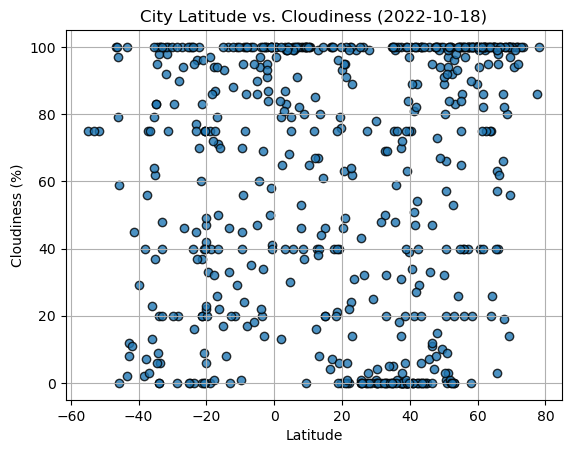

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

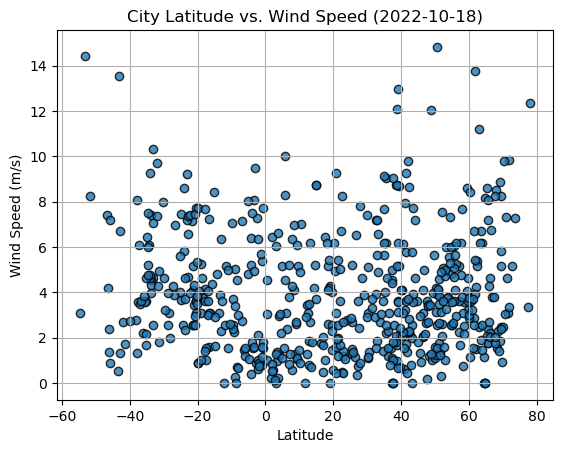

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Scatter Plot
    plt.scatter(x_values,y_values)
    
    # Linear Regression
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,husavik,66.0449,-17.3389,-3.94,58,80,7.00,IS,1675791233
1,pevek,69.7008,170.3133,-30.54,96,100,1.29,RU,1675791248
3,jamestown,42.0970,-79.2353,8.34,50,75,6.17,US,1675791096
4,lazaro cardenas,17.9583,-102.2000,28.65,54,26,2.87,MX,1675791255
11,cabo san lucas,22.8909,-109.9124,24.47,62,40,2.06,MX,1675791246


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bluff,-46.6000,168.3333,10.45,73,86,10.97,NZ,1675791070
5,carnarvon,-24.8667,113.6333,24.76,71,4,9.59,AU,1675791257
6,cape town,-33.9258,18.4232,23.39,77,20,10.80,ZA,1675791024
7,maun,-19.9833,23.4167,29.98,51,0,1.54,BW,1675791260
8,alyangula,-13.8483,136.4192,28.09,70,95,2.39,AU,1675791082


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7224698670659179


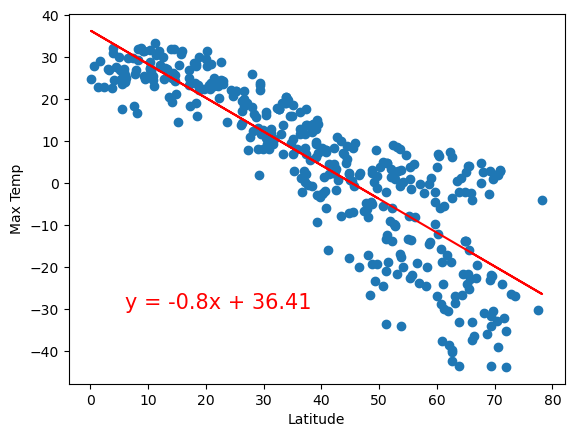

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-30))


The r-value is: 0.4121057168607245


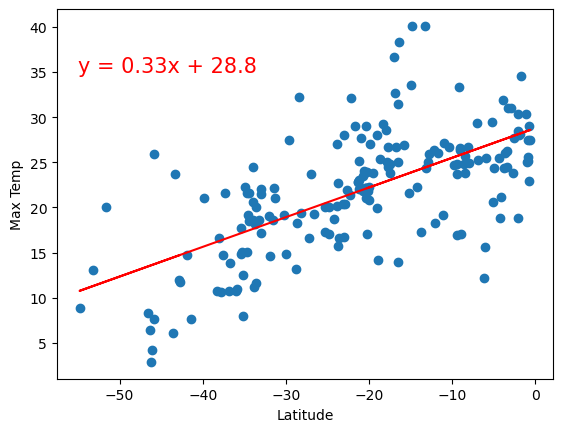

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


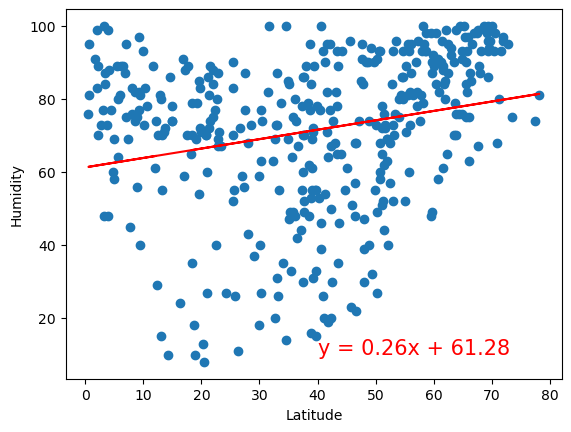

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


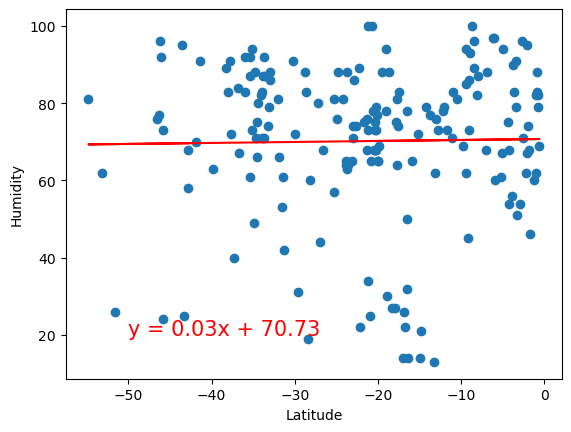

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


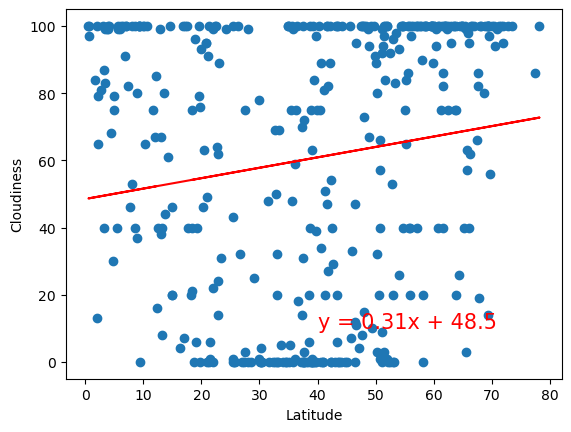

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


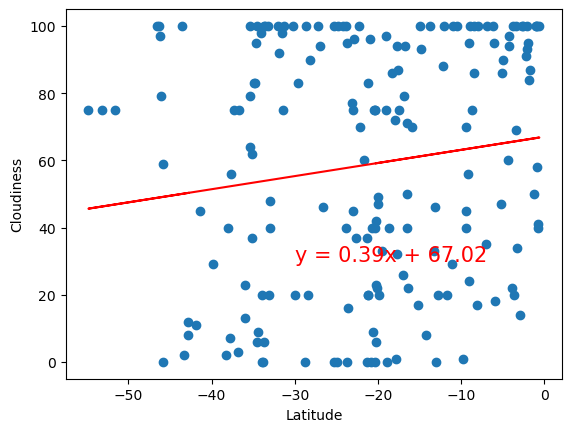

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


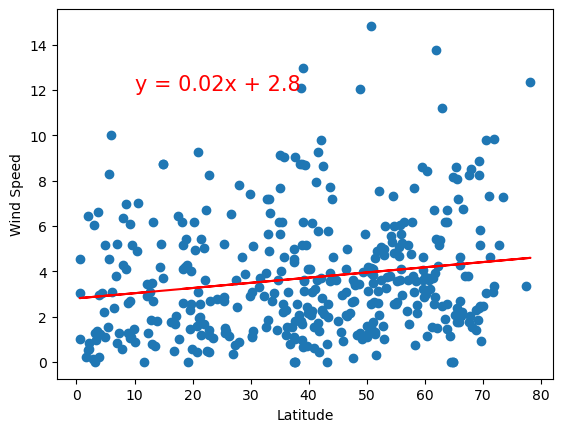

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


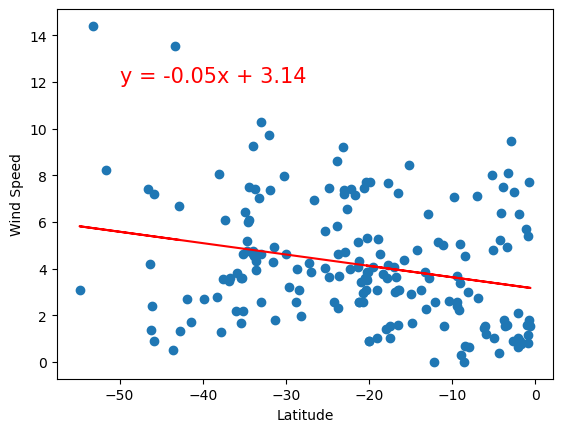

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE